In [1]:
#Importing necessary packages

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn import metrics
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset - Reading the data as a data frame
concrete_df = pd.read_csv('concrete.csv')
df=concrete_df.copy()

In [3]:
# Finding Shape of data
# Inference : There are 1030 rows and 9 columns of data
df.shape

(1030, 9)

In [4]:
# Finding Type
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
# Checking for duplicates

df[df.duplicated()]

# duplicate exist

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [6]:
# Dropping duplicates

df= df.drop_duplicates(keep="first")

In [7]:
df[df.duplicated()]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [8]:
# All duplicates were removed and now, check for dataframe shape

df.shape

(1005, 9)

In [9]:
# 25 duplicate rows were removed

In [10]:
# Viewing first 10 rows of data
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


Observations:

i. There are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength)

ii. All the records are numeric

In [11]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64
 4   superplastic  1005 non-null   float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1005 non-null   float64
 7   age           1005 non-null   int64  
 8   strength      1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [12]:
# Checking presence of missing values
df.isna().apply(pd.value_counts)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
False,1005,1005,1005,1005,1005,1005,1005,1005,1005


Observations:
1. There are 1005 rows and 9 columns of data in the given dataset
2. The data types of age column is "integer" and all other 8 columns are "float"
3. There are no null values in the data

In [13]:
# Five point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


Observation: cement, slag and ash looks to be rightly skewed

### Univariate Analysis of independent attributes

#### Independent Attribute-1 : cement

In [14]:
#Outlier detection from Interquartile range (IQR) in original data

Q1=df['cement'].quantile(q=0.25) # 1st Quartile
Q3=df['cement'].quantile(q=0.75) #3rd Quartile
L_outliers=Q1-1.5*(Q3-Q1)# Lower Outliers
U_outliers=Q3+1.5*(Q3-Q1)#Upper Outliers
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -46.75000000000003
Upper outliers in cement:  586.45


In [15]:
print('Number of upper outliers in cement : ', df[df['cement']>586.45]['cement'].count())
print('Number of lower outliers in cement: ', df[df['cement']<-46.75000000000003]['cement'].count())
print('% of upper outlier in cement: ',round(df[df['cement']>586.45]['cement'].count()*100/len(df)), '%')
print('% of lower Outlier in cement: ',round(df[df['cement']<-46.75000000000003]['cement'].count()*100/len(df)), '%')

Number of upper outliers in cement :  0
Number of lower outliers in cement:  0
% of upper outlier in cement:  0.0 %
% of lower Outlier in cement:  0.0 %


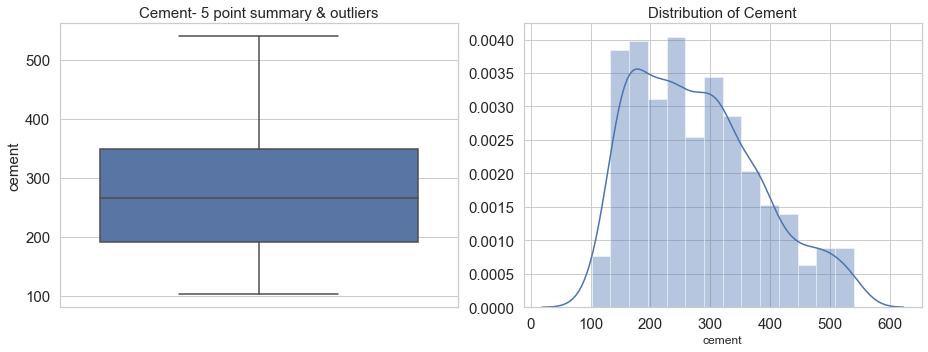

In [16]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
#boxplot
sns.boxplot(x='cement',data=df,orient='v',ax=ax1)
ax1.set_ylabel('cement', fontsize=15)
ax1.set_title('Cement- 5 point summary & outliers', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['cement'],ax=ax2)
ax2.set_title('Distribution of Cement', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Independent Attribute-2 : slag

In [17]:
#Outlier detection from Interquartile range (IQR) in original data

Q1=df['slag'].quantile(q=0.25) # 1st Quartile
Q3=df['slag'].quantile(q=0.75) #3rd Quartile
L_outliers=Q1-1.5*(Q3-Q1)# Lower Outliers
U_outliers=Q3+1.5*(Q3-Q1)#Upper Outliers
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -213.75
Upper outliers in slag:  356.25


In [18]:
print('Number of upper outliers in slag : ', df[df['slag']>356.25]['slag'].count())
print('Number of lower outliers in slag: ', df[df['slag']<-213.75]['slag'].count())
print('% of upper outlier in slag: ',round(df[df['slag']>356.25]['slag'].count()*100/len(df)), '%')
print('% of lower Outlier in slag: ',round(df[df['slag']<-213.75]['slag'].count()*100/len(df)), '%')

Number of upper outliers in slag :  2
Number of lower outliers in slag:  0
% of upper outlier in slag:  0.0 %
% of lower Outlier in slag:  0.0 %


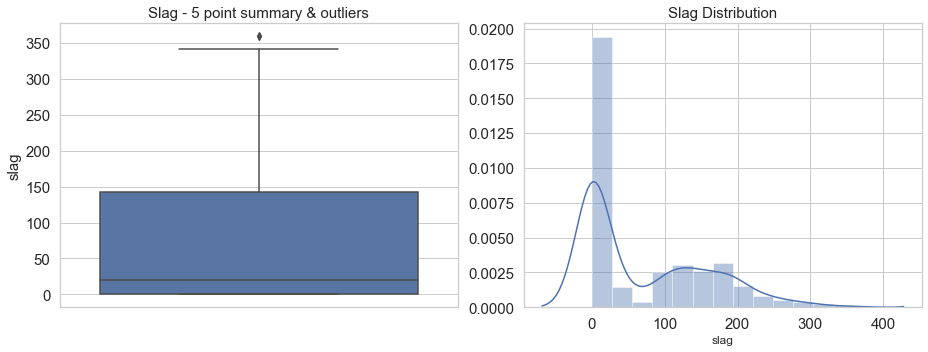

In [19]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=df,orient='v',ax=ax1)
ax1.set_ylabel('slag', fontsize=15)
ax1.set_title('Slag - 5 point summary & outliers', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['slag'],ax=ax2)
ax2.set_title('Slag Distribution', fontsize=15)
ax2.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Independent Attribute-3 : ash

In [20]:
#Outlier detection from Interquartile range (IQR) in original data

Q1=df['ash'].quantile(q=0.25) # 1st Quartile
Q3=df['ash'].quantile(q=0.75) #3rd Quartile
L_outliers=Q1-1.5*(Q3-Q1)# Lower Outliers
U_outliers=Q3+1.5*(Q3-Q1)#Upper Outliers
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [21]:
print('Number of upper outliers in ash : ', df[df['ash']>295.75]['ash'].count())
print('Number of lower outliers in ash: ', df[df['ash']<-177.45]['ash'].count())
print('% of upper outlier in ash: ',round(df[df['ash']>295.75]['ash'].count()*100/len(df)), '%')
print('% of lower Outlier in ash: ',round(df[df['ash']<-177.45]['ash'].count()*100/len(df)), '%')

Number of upper outliers in ash :  0
Number of lower outliers in ash:  0
% of upper outlier in ash:  0.0 %
% of lower Outlier in ash:  0.0 %


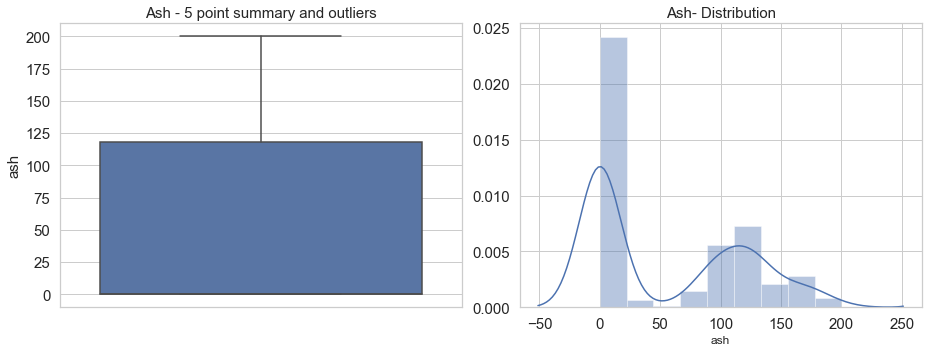

In [22]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=df,orient='v',ax=ax1)
ax1.set_ylabel('ash', fontsize=15)
ax1.set_title('Ash - 5 point summary and outliers', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['ash'],ax=ax2)
ax2.set_title('Ash- Distribution', fontsize=15)
ax2.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Independent attribute-4: water

In [23]:
#Outlier detection from Interquartile range (IQR) in original data

Q1=df['water'].quantile(q=0.25) # 1st Quartile
Q3=df['water'].quantile(q=0.75) #3rd Quartile
L_outliers=Q1-1.5*(Q3-Q1)# Lower Outliers
U_outliers=Q3+1.5*(Q3-Q1)#Upper Outliers
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  127.14999999999998
Upper outliers in water:  232.35000000000002


In [24]:
print('Number of outliers in water upper : ', df[df['water']>232.35000000000002]['water'].count())
print('Number of outliers in water lower : ', df[df['water']<127.14999999999998]['water'].count())
print('% of Outlier in water upper: ',round(df[df['water']>232.35000000000002]['water'].count()*100/len(df)), '%')
print('% of Outlier in water lower: ',round(df[df['water']<127.14999999999998]['water'].count()*100/len(df)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  11
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  1.0 %


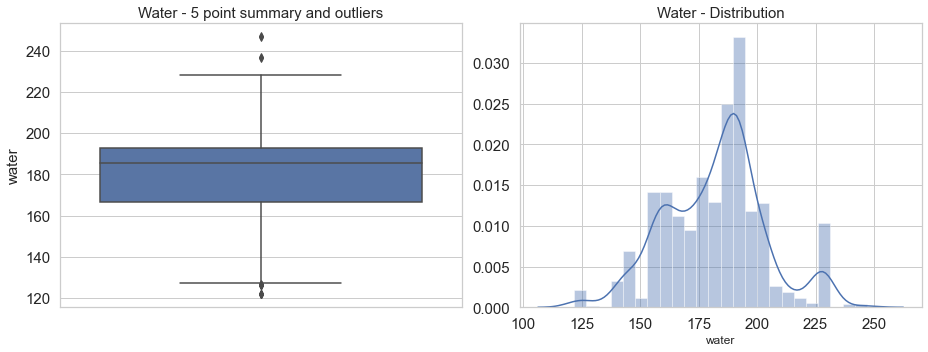

In [25]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=df,orient='v',ax=ax1)
ax1.set_ylabel('water', fontsize=15)
ax1.set_title('Water - 5 point summary and outliers', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['water'],ax=ax2)
ax2.set_title('Water - Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Independent attribute-5: superplastic

In [26]:
#Outlier detection from Interquartile range (IQR) in original data

Q1=df['superplastic'].quantile(q=0.25) # 1st Quartile
Q3=df['superplastic'].quantile(q=0.75) #3rd Quartile
L_outliers=Q1-1.5*(Q3-Q1)# Lower Outliers
U_outliers=Q3+1.5*(Q3-Q1)#Upper Outliers
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.0
Upper outliers in superplastic:  25.0


In [27]:
print('Number of upper outliers in superplastic : ', df[df['superplastic']>25.0]['superplastic'].count())
print('Number of lower outliers in superplastic : ', df[df['superplastic']<-15.0]['superplastic'].count())
print('% of upper Outlier in superplastic : ',round(df[df['superplastic']>25.0]['superplastic'].count()*100/len(df)), '%')
print('% of lower Outlier in superplastic: ',round(df[df['superplastic']<-15.0]['superplastic'].count()*100/len(df)), '%')

Number of upper outliers in superplastic :  10
Number of lower outliers in superplastic :  0
% of upper Outlier in superplastic :  1.0 %
% of lower Outlier in superplastic:  0.0 %


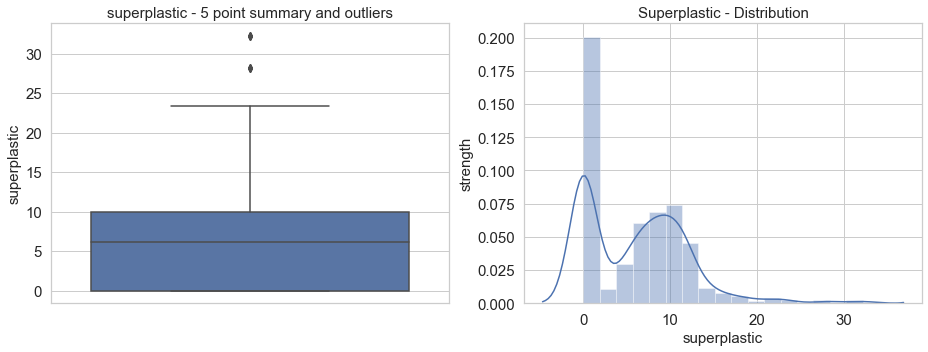

In [28]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=df,orient='v',ax=ax1)
ax1.set_ylabel('superplastic', fontsize=15)
ax1.set_title('superplastic - 5 point summary and outliers', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['superplastic'],ax=ax2)
ax2.set_xlabel('superplastic', fontsize=15)
ax2.set_ylabel('strength', fontsize=15)
ax2.set_title('Superplastic - Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Independent attribute-6: coarseagg

In [29]:
#Outlier detection from Interquartile range (IQR) in original data

Q1=df['coarseagg'].quantile(q=0.25) # 1st Quartile
Q3=df['coarseagg'].quantile(q=0.75) #3rd Quartile
L_outliers=Q1-1.5*(Q3-Q1)# Lower Outliers
U_outliers=Q3+1.5*(Q3-Q1)#Upper Outliers
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  783.5
Upper outliers in coarseagg:  1179.5


In [30]:
print('Number of outliers in coarseagg upper : ', df[df['coarseagg']>1179.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', df[df['coarseagg']<783.5]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(df[df['coarseagg']>1179.5]['coarseagg'].count()*100/len(df)), '%')
print('% of Outlier in coarseagg lower: ',round(df[df['coarseagg']<783.5]['coarseagg'].count()*100/len(df)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


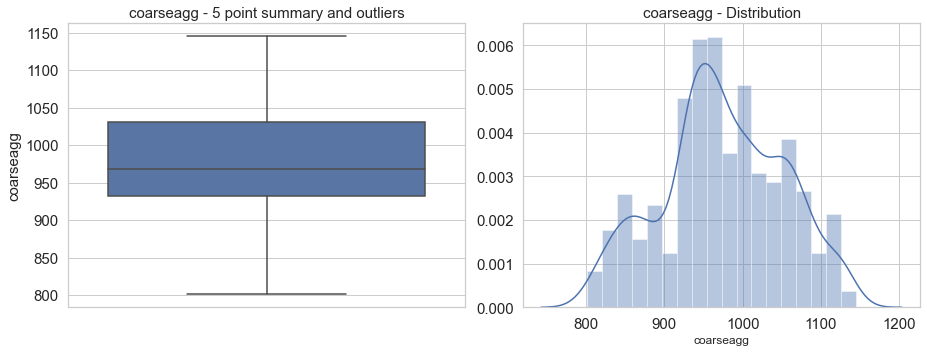

In [31]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=df,orient='v',ax=ax1)
ax1.set_ylabel('coarseagg', fontsize=15)
ax1.set_title('coarseagg - 5 point summary and outliers', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['coarseagg'],ax=ax2)
ax2.set_title('coarseagg - Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Independent attribute-7: fineagg

In [32]:
#Outlier detection from Interquartile range (IQR) in original data

Q1=df['fineagg'].quantile(q=0.25) # 1st Quartile
Q3=df['fineagg'].quantile(q=0.75) #3rd Quartile
L_outliers=Q1-1.5*(Q3-Q1)# Lower Outliers
U_outliers=Q3+1.5*(Q3-Q1)#Upper Outliers
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

Lower outliers in fineagg:  577.4499999999998
Upper outliers in fineagg:  969.0500000000002


In [33]:
print('Number of outliers in fineagg upper : ', df[df['fineagg']>969.0500000000002]['fineagg'].count())
print('Number of outliers in fineagg lower : ', df[df['fineagg']<577.4499999999998]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(df[df['fineagg']>969.0500000000002]['fineagg'].count()*100/len(df)), '%')
print('% of Outlier in fineagg lower: ',round(df[df['fineagg']<577.4499999999998]['fineagg'].count()*100/len(df)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


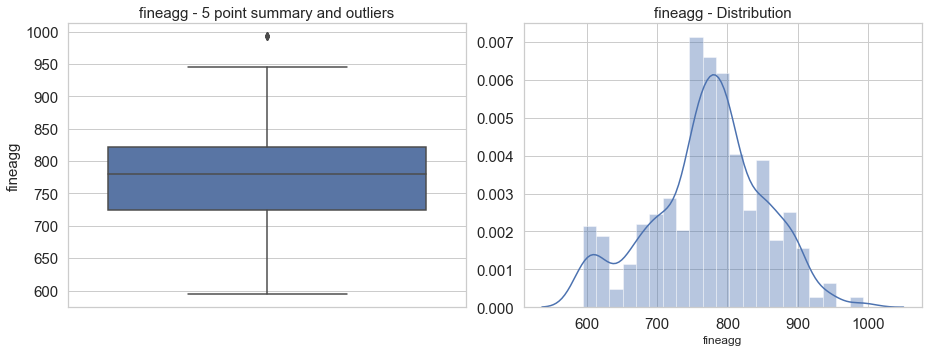

In [34]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=df,orient='v',ax=ax1)
ax1.set_ylabel('fineagg', fontsize=15)
ax1.set_title('fineagg - 5 point summary and outliers', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['fineagg'],ax=ax2)
ax2.set_title('fineagg - Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Independent Attribute-8: age

In [35]:
#### Outlier detection from Interquartile range (IQR) in original data

Q1=df['age'].quantile(q=0.25) # 1st Quartile
Q3=df['age'].quantile(q=0.75) #3rd Quartile
L_outliers=Q1-1.5*(Q3-Q1)# Lower Outliers
U_outliers=Q3+1.5*(Q3-Q1)#Upper Outliers
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [36]:
print('Number of outliers in age upper : ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', df[df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(df[df['age']>129.5]['age'].count()*100/len(df)), '%')
print('% of Outlier in age lower: ',round(df[df['age']<-66.5]['age'].count()*100/len(df)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


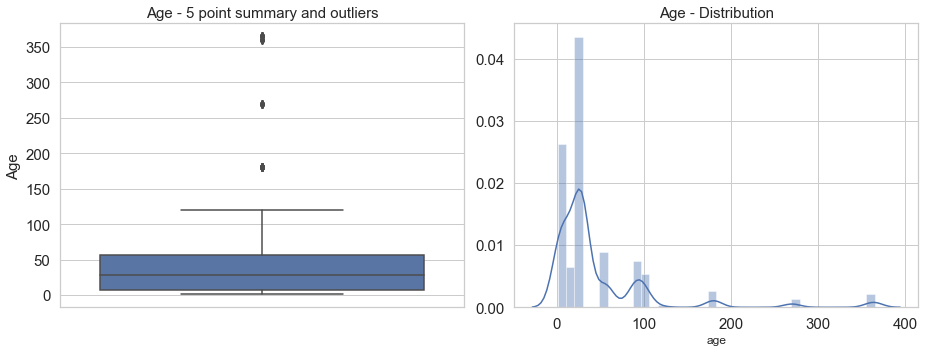

In [37]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age - 5 point summary and outliers', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['age'],ax=ax2)
ax2.set_title('Age - Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

#### Target Variable -  Strength

In [38]:
#### Outlier detection from Interquartile range (IQR) in original data

Q1=df['strength'].quantile(q=0.25) # 1st Quartile
Q3=df['strength'].quantile(q=0.75) #3rd Quartile
L_outliers=Q1-1.5*(Q3-Q1)# Lower Outliers
U_outliers=Q3+1.5*(Q3-Q1)#Upper Outliers
print('Lower outliers in strength: ', L_outliers)
print('Upper outliers in strength: ', U_outliers)

Lower outliers in strength:  -8.504999999999999
Upper outliers in strength:  76.895


In [39]:
print('Number of outliers in strength upper : ', df[df['strength']>76.895]['strength'].count())
print('Number of outliers in strength lower : ', df[df['strength']<-8.504999999999999]['strength'].count())
print('% of Outlier in strength upper: ',round(df[df['strength']>76.895]['strength'].count()*100/len(df)), '%')
print('% of Outlier in strength lower: ',round(df[df['strength']<-8.504999999999999]['strength'].count()*100/len(df)), '%')

Number of outliers in strength upper :  8
Number of outliers in strength lower :  0
% of Outlier in strength upper:  1.0 %
% of Outlier in strength lower:  0.0 %


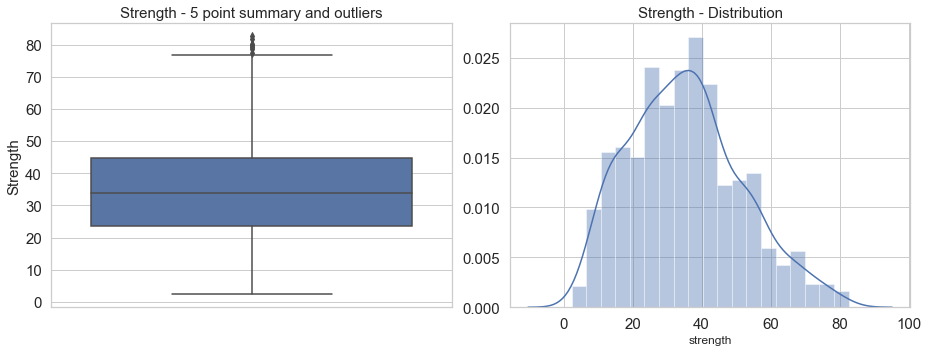

In [40]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='strength',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Strength', fontsize=15)
ax1.set_title('Strength - 5 point summary and outliers', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['strength'],ax=ax2)
ax2.set_title('Strength - Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

In [41]:
# Handling Outliers

#Replacing the outliers by median
for col_name in df.columns[:-1]:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

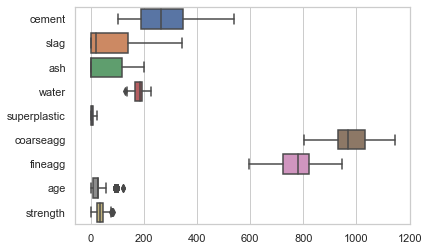

In [42]:
# Plottng Box Plot to check whether outliers are removed after removing outliers
ax = sns.boxplot(data=df, orient="h")

Observation: When we remove outliers and replace with median, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them


In [43]:
# skewness

df.skew()

cement          0.564959
slag            0.830443
ash             0.497231
water           0.126628
superplastic    0.513287
coarseagg      -0.065256
fineagg        -0.335247
age             1.312008
strength        0.395696
dtype: float64

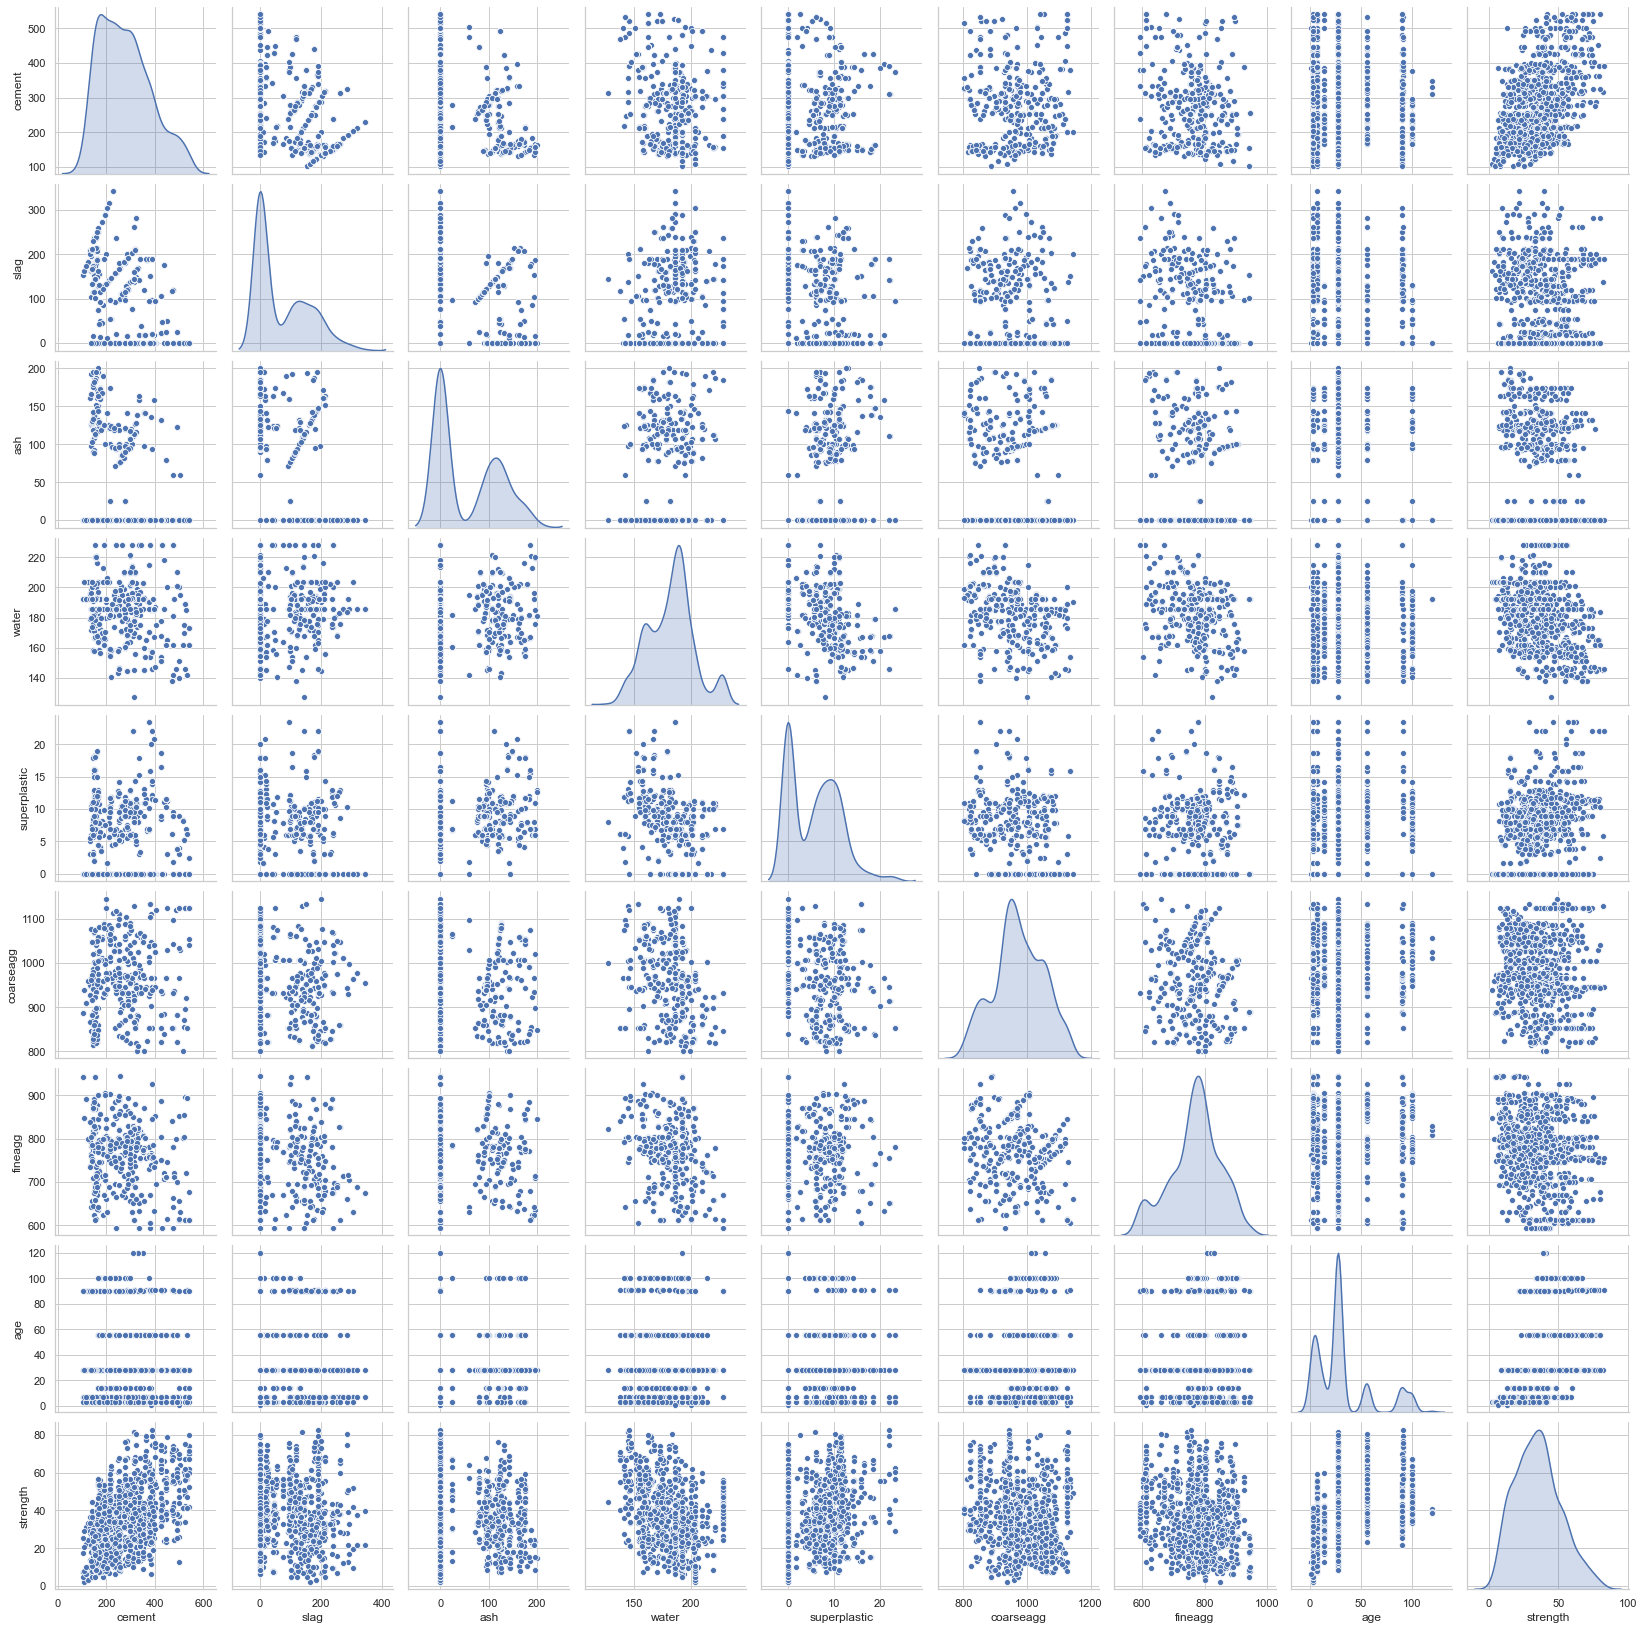

In [44]:
## pairplot

sns.pairplot(df, diag_kind='kde')
plt.show()

Observations:
1. cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud.
2. slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud.
3. ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud.
4. water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes.
5. superplastic vs other independent attributes:This attribute has negative linear relationship only with water. It does not have any significant relationship with other independent attributes.
6. coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud.
7. fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud.
8. age vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud.
9. strength (dependent attribute) vs other independent attributes:
10. strength vs cement: It is linearly related to the cement. The relationship is positive and for a given value of cement, there are multiple values of strength. Hence, though cement has positive relationship with the strength, it is not a very good predictor. It is a weak predictor.
11. strength vs slag: There is no particular trend.
12. strength vs slag: There is no particular trend.
13. strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
14. strength vs superplastic:For a given value of age, there are multiple values of strength. Hence, It is not a good predictor.
25. None of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.So, Linear model cannot be used

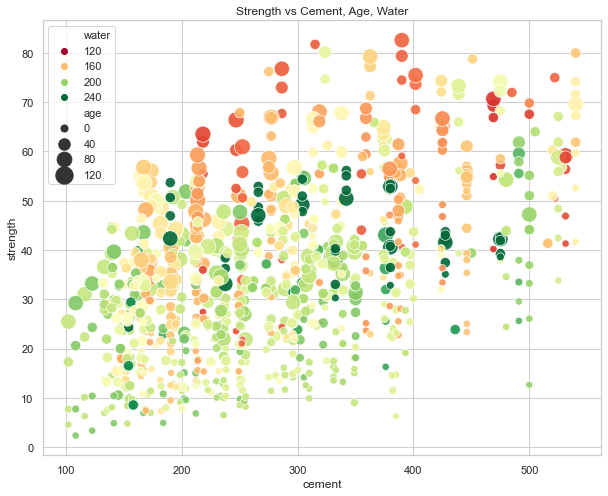

In [45]:
### Analyzing Dependent variable (Strength) vs Independent variable (cement, age and water)
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="strength", x="cement", hue="water", size="age", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlGn', alpha=0.9)
ax.set_title("Strength vs Cement, Age, Water")
ax.legend()
plt.show()

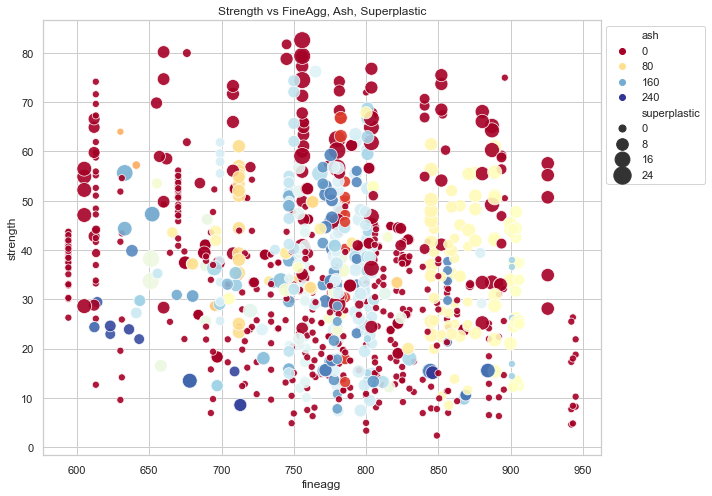

In [46]:
### Analyzing Dependent variable (Strength) vs Independent variable (FineAgg, Ash, Superplastic)
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="strength", x="fineagg", hue="ash", size="superplastic", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlBu', alpha=0.9)
ax.set_title("Strength vs FineAgg, Ash, Superplastic")
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) # Moved outside the chart so it doesn't cover any data
plt.show()

observation:

1. strength doesnt have any clear correlation with ash
2. strength correlates positively with superplastic



In [47]:
# correlation matrix 
cor=df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303669,-0.385610,-0.053217,-0.026511,-0.086205,-0.262508,-0.038201,0.488283
slag,-0.303669,1.000000,-0.308903,0.132249,0.034945,-0.277239,-0.291118,-0.035485,0.105877
ash,-0.385610,-0.308903,1.000000,-0.296261,0.492786,-0.026468,0.103619,0.063818,-0.080648
water,-0.053217,0.132249,-0.296261,1.000000,-0.610666,-0.213945,-0.425633,-0.034910,-0.278499
superplastic,-0.026511,0.034945,0.492786,-0.610666,1.000000,-0.195028,0.136685,0.057438,0.318721
coarseagg,-0.086205,-0.277239,-0.026468,-0.213945,-0.195028,1.000000,-0.144140,0.022952,-0.144717
fineagg,-0.262508,-0.291118,0.103619,-0.425633,0.136685,-0.144140,1.000000,0.051224,-0.202883
age,-0.038201,-0.035485,0.063818,-0.034910,0.057438,0.022952,0.051224,1.000000,0.498530
strength,0.488283,0.105877,-0.080648,-0.278499,0.318721,-0.144717,-0.202883,0.498530,1.000000


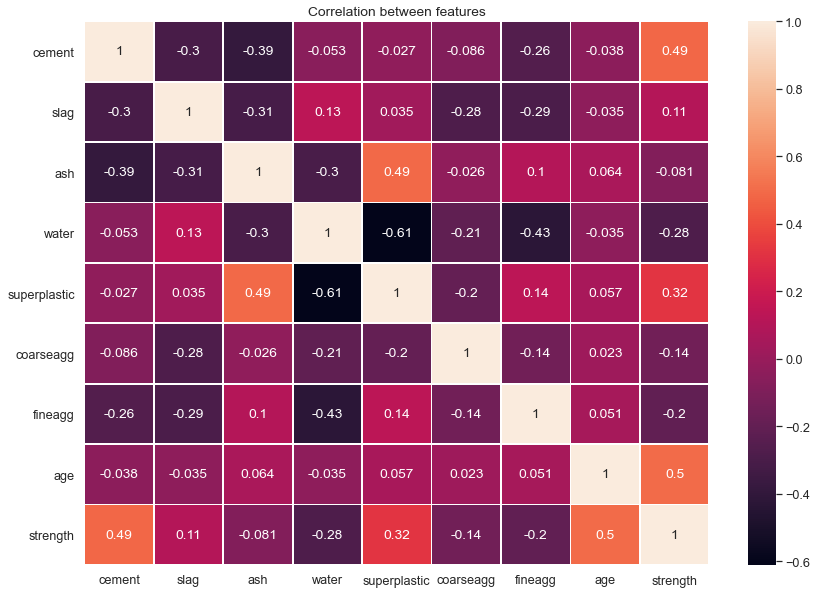

In [48]:
#heatmap

sns.set(font_scale=1.15)
fig, axs = plt.subplots(figsize=(14,10))        
sns.heatmap(cor, annot=True, linewidths=.8, ax=axs)
plt.title('Correlation between features');

Observations from heatmap:
1. water shows negative relationship with superplastic and fineagg
2. water also shows some kind of positive relationship with slag and age
3. superplastic shows positive relationship with as

#### Creation of Composite feature

1. A key component for testing strength and durability of concrete mix is the water to cement ratio.
2. A lower ratio leads to higher strength and durability.
3. Since this attribute doesnt exist in the dataset; hence we will compute and add this attribute.


In [49]:
df['w/c ratio']=df['water']/df['cement']

In [50]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,w/c ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,1.440198
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,0.937241
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,0.749600
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,0.857143
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,1.248708


In [51]:
# Scaling the features

df_z = df.apply(zscore)
df_z=pd.DataFrame(df_z,columns=df.columns)


Observations:
1. all the attributes in the same scale except the age attribute. Hence, we are scaling the attributes.
2. zscore is used for scaling

In [52]:
df_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,w/c ratio
0,-1.316792,1.650657,-0.865375,1.043488,-1.073915,-0.033232,-0.293599,-0.148903,-0.329328,2.191929
1,-1.052152,-0.342358,1.071486,-1.204851,0.928056,1.372475,0.311864,-0.655204,-0.721299,0.576284
2,-0.274530,-0.837677,0.625836,0.242642,-0.054393,-0.225388,1.136918,-0.148903,-0.370491,-0.026473
3,-0.121115,0.500389,-0.865375,2.262168,-1.073915,-0.546508,-1.290012,-0.148903,0.651214,0.318986
4,-1.187348,1.314966,-0.865375,0.536120,0.612931,0.941736,-0.951105,-0.148903,-1.042003,1.576807


In [53]:
# Splitting the data into independent and dependent attributes

X = df_z.drop(columns = ['strength'])
y = df_z.strength

In [54]:
# Spliting data into training and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [55]:
# Dimension reduction/dropping feature using shrinkage method - Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
X_train.columns

Lasso model: [ 0.3888813   0.18068954  0.         -0.02481644  0.16415727 -0.
 -0.          0.40709899 -0.12073398]


Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'w/c ratio'],
      dtype='object')

Observation:
1. Based on Lasso model, coefficients have become 0 for attributes: ash, coarseagg and fineagg indicating those dimensions can be dropped from the model



In [56]:

X= df_z.drop(columns=['strength','ash','coarseagg','fineagg'])

In [57]:
# lets check split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(X.index)) * 100))
print("{0:0.2f}% data is in training set".format((len(X_test)/len(X.index)) * 100))


69.95% data is in training set
30.05% data is in training set


Lets train the model in following regression algorithms

    Linear Regression
    Polynomial Regression
    Decision Tree
    Random Forest
    Bagging
    Ada Boost
    Gradient Boost


In [58]:
# Fitting simple linear model

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lrtr=lr.predict(X_train)
y_pred_lrte=lr.predict(X_test)
from sklearn.metrics import r2_score
print('Linear model Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Linear model Test R2 score: ',r2_score(y_test,y_pred_lrte))

Linear model Train R2 score:  0.7304977102911947
Linear model Test R2 score:  0.6489264214829492


In [59]:
# Fitting polynomial models 
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.8739756851435053
Test R2 - degree 2 polynomial:  0.828433643211289


In [60]:
pf = PolynomialFeatures(degree = 3)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 3 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 3 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 3 polynomial:  0.952219558800389
Test R2 - degree 3 polynomial:  0.8155757717526988


In [61]:
pf = PolynomialFeatures(degree = 4)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 4 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 4 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 4 polynomial:  0.9881086514044372
Test R2 - degree 4 polynomial:  -1.6032416628720327e+19


In [62]:
pf = PolynomialFeatures(degree = 5)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 5 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 5 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 5 polynomial:  0.9931857400236248
Test R2 - degree 5 polynomial:  -5.014961983112514e+17


The model does not perform well for higher degree polynomial features ( degrees - 4, 5 , ...) . From this, it is clear that the model is non linear. Thus we proceed with other non-linear models

In [63]:
# Decision Tree algorithm

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [64]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using Decision Tree:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Decision Tree:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using Decision Tree: 0.993626367119582
Performance on testing data using Decision Tree: 0.7768343372187877
Accuracy DT:  0.7768343372187877


In [65]:
# Decision tree algorithm with K fold Cross Validation
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8588149594673865
Standard Deviation:  0.036141215978591996


In [66]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': [acc_DT],'Cross_val_score':[accuracy]})
results = results[['Method', 'Accuracy','Cross_val_score']]
results

,Method,Accuracy,Cross_val_score
0,Decision Tree,0.776834,0.858815


In [67]:
# Random Forest Algorithm 

model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9812152127785088
Performance on testing data using RFR: 0.8834372795167554
Accuracy DT:  0.8834372795167554
MSE:  0.10223935399904745


In [69]:
# Random forest algorithm with K fold Cross Validation
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8982422773398214
Standard Deviation:  0.026917244639605875


In [70]:
#Store the accuracy results for random forest model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'Accuracy': [acc_RFR],'Cross_val_score':[accuracy]})
results = pd.concat([results, tempResultsDf])
#results = results[['Method', 'Accuracy','cross_val_score']]
results

,Method,Accuracy,Cross_val_score
0,Decision Tree,0.776834,0.858815
0,Random Forest Regressor,0.883437,0.898242


In [71]:
# resetting the index
results=results.reset_index()

In [72]:
del results['index']

In [73]:
results

,Method,Accuracy,Cross_val_score
0,Decision Tree,0.776834,0.858815
1,Random Forest Regressor,0.883437,0.898242


In [74]:
# Applying Gradient Boosting Regressor

model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [75]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9429328811805635
Performance on testing data using GBR: 0.8977704632668114
Accuracy DT:  0.8977704632668114
MSE:  0.08966744900849759


In [76]:
# Applying K Fold Cross Validation for Gradient Boost Regressor

num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8839681137358729
Standard Deviation:  0.02417355473803179


In [77]:
#Store the accuracy results for Gradient boost model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'Accuracy': [acc_GBR],'Cross_val_score':[accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy','Cross_val_score']]
results

,Method,Accuracy,Cross_val_score
0,Decision Tree,0.776834,0.858815
1,Random Forest Regressor,0.883437,0.898242
2,Gradient Boost Regressor,0.897770,0.883968


In [78]:
# Ada Boosting Regressor
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [79]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using ABR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ABR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ABR: 0.8192848173628569
Performance on testing data using ABR: 0.7691190502100477
Accuracy DT:  0.7691190502100477
MSE:  0.20251002258139958


In [80]:
# Applying K Fold Cross Validation for Ada Boosting Regressor

num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7704079062088004
Standard Deviation:  0.035918365520167694


In [81]:
#Store the accuracy results for ada boosting model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'Accuracy': [acc_ABR],'Cross_val_score':[accuracy]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy','Cross_val_score']]
results

,Method,Accuracy,Cross_val_score
0,Decision Tree,0.776834,0.858815
1,Random Forest Regressor,0.883437,0.898242
2,Gradient Boost Regressor,0.897770,0.883968
3,Ada Boosting Regressor,0.769119,0.770408


In [82]:
#  Bagging Regressor Algorithm

model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor()

In [83]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using BR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using BR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using BR: 0.9751741554492038
Performance on testing data using BR: 0.8687435142232057
Accuracy DT:  0.8687435142232057
MSE:  0.11512753184182599


In [84]:
# Applying K Fold Cross validation for Bagging Regressor
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8787895716074081
Standard Deviation:  0.0352488460200482


In [85]:
#Store the accuracy results for Bagging model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'Accuracy': [acc_BR],'Cross_val_score':[accuracy]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy','Cross_val_score']]
results

,Method,Accuracy,Cross_val_score
0,Decision Tree,0.776834,0.858815
1,Random Forest Regressor,0.883437,0.898242
2,Gradient Boost Regressor,0.897770,0.883968
3,Ada Boosting Regressor,0.769119,0.770408
4,Bagging Regressor,0.868744,0.878790


Observations:
After applying all the models we can see that Random Forest Regressor, Gradient Boost Regressor, Bagging Regressor are giving better results as compared to other models

In [87]:
#### Model tuning for best 3 models

In [116]:
# Random forest Model Tuning

clf = RandomForestRegressor(n_estimators=200)

In [117]:
# specify parameters and distributions to sample from

from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion":['mse','mae'],
              "random_state":[1]
              }

In [118]:
# run randomized search
samples = 10  # number of random samples 

randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples,random_state=1)

In [119]:
randomCV.fit(X, y) 
print(randomCV.best_params_)

{'bootstrap': True, 'criterion': 'mae', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 1}


In [120]:
## Creating the Random Forest Regressor with the best parameters

RFR=RandomForestRegressor(bootstrap=True,criterion='mae',max_depth=None,max_features=5, min_samples_leaf=1, min_samples_split=5,random_state=1)

In [121]:
RFR.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_features=5, min_samples_split=5,
                      random_state=1)

In [122]:
y_pred = RFR.predict(X_test)
# performance on train data
print('Performance on training data using RF with hyperparameter tunning:',RFR.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RF with hyperparameter tunning:',RFR.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RF_HT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RF_HT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RF with hyperparameter tunning: 0.971011043193625
Performance on testing data using RF with hyperparameter tunning: 0.8850025071566852
Accuracy DT:  0.8850025071566852
MSE:  0.10086646340328552


In [123]:
# Applying K Fold Cross Validation for RFR with best hyperparameter model

num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(RFR,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8947250545613519
Standard Deviation:  0.028248149568528134


In [124]:
#Store the accuracy results for RFR with best hyperparameter model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random forest with best hyperparameter'], 'Accuracy': [acc_RF_HT],'Cross_val_score':[accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy','Cross_val_score']]
results

,Method,Accuracy,Cross_val_score
0,Decision Tree,0.776834,0.858815
1,Random Forest Regressor,0.883437,0.898242
2,Gradient Boost Regressor,0.897770,0.883968
3,Ada Boosting Regressor,0.769119,0.770408
4,Bagging Regressor,0.868744,0.878790
5,Random forest with best hyperparameter,0.885003,0.894725


In [132]:
# Gradient Booster Model Tuning
estimator = GradientBoostingRegressor()

In [133]:
estimator.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [134]:
estimator=GradientBoostingRegressor()
search_grid={'n_estimators':[200],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,3,4,5],'subsample':[.5,.75,1],'random_state':[1]}
search=RandomizedSearchCV(estimator=estimator,param_distributions=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=10,random_state=1)

In [135]:
search.fit(X, y) 
print(search.best_params_)

{'subsample': 1, 'random_state': 1, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}


In [136]:
GBR_HT=GradientBoostingRegressor(subsample=1,n_estimators=200,max_depth=4,learning_rate=0.1,random_state=1)

In [137]:
GBR_HT.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=1,
                          subsample=1)

In [138]:
y_pred = GBR_HT.predict(X_test)
# performance on train data
print('Performance on training data using GBR with hyperparameter tuning:',GBR_HT.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR with hyperparameter tuning:',GBR_HT.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR_HT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR_HT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR with hyperparameter tuning: 0.9817502495521458
Performance on testing data using GBR with hyperparameter tuning: 0.9241620645623776
Accuracy DT:  0.9241620645623776
MSE:  0.06651887924045612


In [139]:
# Applying K Fold Cross Validation for Gradient Boosting Alogrithm with best hyperparameter model

num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(GBR_HT,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9198112325724311
Standard Deviation:  0.020731304632019668


In [140]:
#Store the accuracy results for GBR with best hyperparameter model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting with best hyperparameter'], 'Accuracy': [acc_GBR_HT],'Cross_val_score':[accuracy]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy','Cross_val_score']]
results

,Method,Accuracy,Cross_val_score
0,Decision Tree,0.776834,0.858815
1,Random Forest Regressor,0.883437,0.898242
2,Gradient Boost Regressor,0.897770,0.883968
3,Ada Boosting Regressor,0.769119,0.770408
4,Bagging Regressor,0.868744,0.878790
5,Random forest with best hyperparameter,0.885003,0.894725
6,Gradient Boosting with best hyperparameter,0.924162,0.919811


In [143]:
# Bagging Regressor hyperparameter tuning

estimator=BaggingRegressor()
search_grid={'n_estimators':[200],"max_features":[0.5,1.0,X.shape[0]//2],"max_samples": [0.5,1.0,X.shape[1]//2],"bootstrap": [True, False],'random_state':[1],"bootstrap_features":[True,False]}
search=RandomizedSearchCV(estimator=estimator,param_distributions=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=10,random_state=1)

In [144]:
search.fit(X, y) 
print(search.best_params_)

{'random_state': 1, 'n_estimators': 200, 'max_samples': 0.5, 'max_features': 1.0, 'bootstrap_features': False, 'bootstrap': False}


In [145]:
BAG_HT=BaggingRegressor(bootstrap=False,bootstrap_features=False,n_estimators=200,max_features=1.0,max_samples=0.5,random_state=1)

In [146]:
BAG_HT.fit(X_train, y_train)

BaggingRegressor(bootstrap=False, max_samples=0.5, n_estimators=200,
                 random_state=1)

In [147]:
y_pred = BAG_HT.predict(X_test)
# performance on train data
print('Performance on training data using Bagging with hyperparameter tuning:',BAG_HT.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Bagging with hyperparameter tuning:',BAG_HT.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BAG_HT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BAG_HT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Bagging with hyperparameter tuning: 0.97006330887634
Performance on testing data using Bagging with hyperparameter tuning: 0.8833691285312935
Accuracy DT:  0.8833691285312935
MSE:  0.1022991305099177


In [148]:
# Applying K Fold Cross Validation for Bagging Alogrithm with best hyperparameter model

num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(BAG_HT,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8944097150435972
Standard Deviation:  0.02645744479389074


In [149]:
#Store the accuracy results for Bagging Regressor with best hyperparameter model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging with best hyperparameter'], 'Accuracy': [acc_BAG_HT],'Cross_val_score':[accuracy]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy','Cross_val_score']]
results

,Method,Accuracy,Cross_val_score
0,Decision Tree,0.776834,0.858815
1,Random Forest Regressor,0.883437,0.898242
2,Gradient Boost Regressor,0.897770,0.883968
3,Ada Boosting Regressor,0.769119,0.770408
4,Bagging Regressor,0.868744,0.878790
5,Random forest with best hyperparameter,0.885003,0.894725
6,Gradient Boosting with best hyperparameter,0.924162,0.919811
7,Bagging with best hyperparameter,0.883369,0.894410


Conclusion: The best model is gradient boosting with below hyper parameter:
{'subsample': 1, 'random_state': 1, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}